In [1]:
%matplotlib inline
import random
random.seed(10)
import numpy as np 
np.random.seed(10)
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import multiprocessing
cpn_cnt = multiprocessing.cpu_count()

In [2]:
pwd

'C:\\Users\\ashte\\supervised_python\\speed_dating_data-20230130T034810Z-001\\speed_dating_data'

In [3]:
DATA = pd.read_csv('C:\\Users\\ashte\\supervised_python\\speed_dating_data-20230130T034810Z-001\\speed_dating_data\\Speed Dating Data.csv', encoding='ISO-8859-1')
DATA.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [4]:
DATA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Columns: 195 entries, iid to amb5_3
dtypes: float64(174), int64(13), object(8)
memory usage: 12.5+ MB


In [5]:
DATA.isnull().sum()

iid            0
id             1
gender         0
idg            0
condtn         0
            ... 
attr5_3     6362
sinc5_3     6362
intel5_3    6362
fun5_3      6362
amb5_3      6362
Length: 195, dtype: int64

In [6]:
DATA.drop(['id', 'iid'], axis=1, inplace=True)

In [7]:
pd.crosstab(DATA['match'], 'count')

col_0,count
match,
0,6998
1,1380


In [8]:
filter_1 = ['gender', 'match', 'int_corr', 'age_o', 'pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha', 'dec_o', 'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o', 'like_o', 'prob_o', 'met_o', 'age', 'imprace', 'imprelig', 'income', 'goal', 'date', 'go_out', 'career', 'career_c', 'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga', 'exphappy', 'expnum', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1', 'attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1', 'shar4_1', 'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1', 'attr3_1', 'sinc3_1', 'fun3_1', 'intel3_1', 'amb3_1', 'attr5_1', 'sinc5_1', 'intel5_1', 'fun5_1', 'amb5_1', 'dec', 'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob', 'met', 'match_es', 'attr1_s', 'sinc1_s', 'intel1_s', 'fun1_s', 'amb1_s', 'shar1_s', 'attr3_s', 'sinc3_s', 'intel3_s', 'fun3_s', 'amb3_s', 'satis_2', 'length', 'numdat_2', 'attr7_2', 'sinc7_2', 'intel7_2', 'fun7_2', 'amb7_2', 'shar7_2', 'attr1_2', 'sinc1_2', 'intel1_2', 'fun1_2', 'amb1_2', 'shar1_2', 'attr4_2', 'sinc4_2', 'intel4_2', 'fun4_2', 'amb4_2', 'shar4_2', 'attr2_2', 'sinc2_2', 'intel2_2', 'fun2_2', 'amb2_2', 'shar2_2', 'attr3_2', 'sinc3_2', 'intel3_2', 'fun3_2', 'amb3_2', 'attr5_2', 'sinc5_2', 'intel5_2', 'fun5_2', 'amb5_2', 'you_call', 'them_cal', 'date_3', 'numdat_3', 'num_in_3', 'attr1_3', 'sinc1_3', 'intel1_3', 'fun1_3', 'amb1_3', 'shar1_3', 'attr7_3', 'sinc7_3', 'intel7_3', 'fun7_3', 'amb7_3', 'shar7_3', 'attr4_3', 'sinc4_3', 'intel4_3', 'fun4_3', 'amb4_3', 'shar4_3', 'attr2_3', 'sinc2_3', 'intel2_3', 'fun2_3', 'amb2_3', 'shar2_3', 'attr3_3', 'sinc3_3', 'intel3_3', 'fun3_3', 'amb3_3', 'attr5_3', 'sinc5_3', 'intel5_3', 'fun5_3', 'amb5_3']
DATA = DATA[filter_1]
for f in sorted(list(DATA)):
    print(f)

age
age_o
amb
amb1_1
amb1_2
amb1_3
amb1_s
amb2_1
amb2_2
amb2_3
amb3_1
amb3_2
amb3_3
amb3_s
amb4_1
amb4_2
amb4_3
amb5_1
amb5_2
amb5_3
amb7_2
amb7_3
amb_o
art
attr
attr1_1
attr1_2
attr1_3
attr1_s
attr2_1
attr2_2
attr2_3
attr3_1
attr3_2
attr3_3
attr3_s
attr4_1
attr4_2
attr4_3
attr5_1
attr5_2
attr5_3
attr7_2
attr7_3
attr_o
career
career_c
clubbing
concerts
date
date_3
dec
dec_o
dining
exercise
exphappy
expnum
fun
fun1_1
fun1_2
fun1_3
fun1_s
fun2_1
fun2_2
fun2_3
fun3_1
fun3_2
fun3_3
fun3_s
fun4_1
fun4_2
fun4_3
fun5_1
fun5_2
fun5_3
fun7_2
fun7_3
fun_o
gaming
gender
go_out
goal
hiking
imprace
imprelig
income
int_corr
intel
intel1_1
intel1_2
intel1_3
intel1_s
intel2_1
intel2_2
intel2_3
intel3_1
intel3_2
intel3_3
intel3_s
intel4_1
intel4_2
intel4_3
intel5_1
intel5_2
intel5_3
intel7_2
intel7_3
intel_o
length
like
like_o
match
match_es
met
met_o
movies
museums
music
num_in_3
numdat_2
numdat_3
pf_o_amb
pf_o_att
pf_o_fun
pf_o_int
pf_o_sha
pf_o_sin
prob
prob_o
reading
satis_2
shar
shar1_1
shar1_2
sh

In [9]:
ambs = '''amb
amb1_1
amb1_2
amb1_3
amb1_s
amb2_1
amb2_2
amb2_3
amb3_1
amb3_2
amb3_3
amb3_s
amb4_1
amb4_2
amb4_3
amb5_1
amb5_2
amb5_3
amb7_2
amb7_3
amb_o'''.split()

attrs = '''attr
attr1_1
attr1_2
attr1_3
attr1_s
attr2_1
attr2_2
attr2_3
attr3_1
attr3_2
attr3_3
attr3_s
attr4_1
attr4_2
attr4_3
attr5_1
attr5_2
attr5_3
attr7_2
attr7_3
attr_o'''.split()

funs = '''fun
fun1_1
fun1_2
fun1_3
fun1_s
fun2_1
fun2_2
fun2_3
fun3_1
fun3_2
fun3_3
fun3_s
fun4_1
fun4_2
fun4_3
fun5_1
fun5_2
fun5_3
fun7_2
fun7_3
fun_o'''.split()

intels = '''intel
intel1_1
intel1_2
intel1_3
intel1_s
intel2_1
intel2_2
intel2_3
intel3_1
intel3_2
intel3_3
intel3_s
intel4_1
intel4_2
intel4_3
intel5_1
intel5_2
intel5_3
intel7_2
intel7_3
intel_o'''.split()

shars = '''shar
shar1_1
shar1_2
shar1_3
shar1_s
shar2_1
shar2_2
shar2_3
shar4_1
shar4_2
shar4_3
shar7_2
shar7_3
shar_o'''.split()

sincs = '''sinc
sinc1_1
sinc1_2
sinc1_3
sinc1_s
sinc2_1
sinc2_2
sinc2_3
sinc3_1
sinc3_2
sinc3_3
sinc3_s
sinc4_1
sinc4_2
sinc4_3
sinc5_1
sinc5_2
sinc5_3
sinc7_2
sinc7_3
sinc_o'''.split()

In [10]:
type(sincs)

list

In [18]:
intersted_field = [ambs, attrs, funs, intels, shars, sincs]

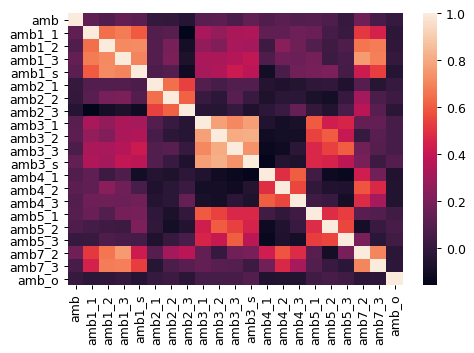

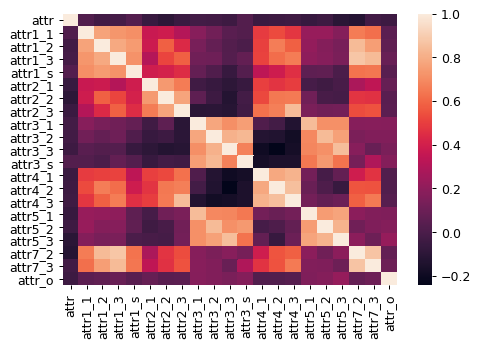

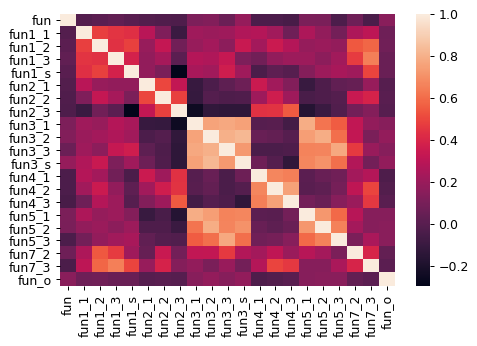

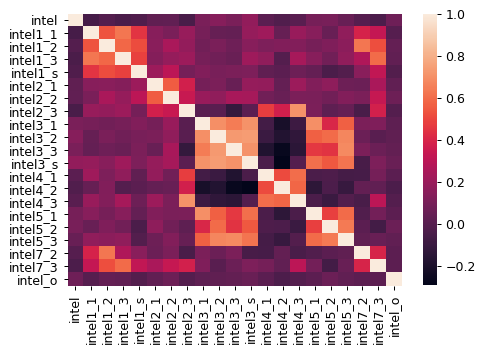

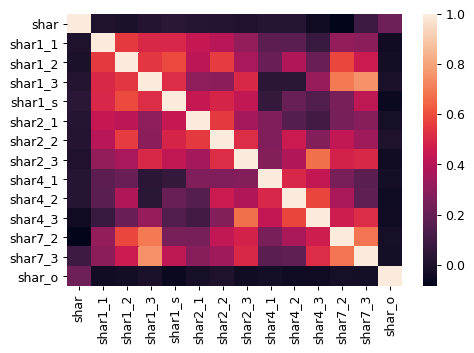

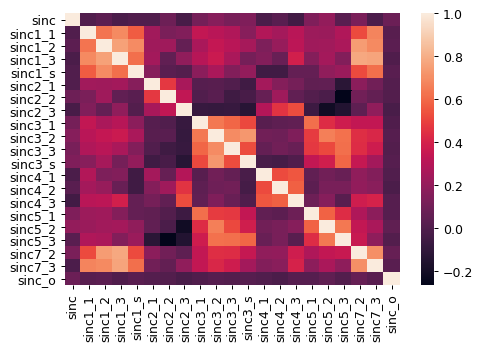

In [19]:
for f in intersted_field:
    fig, ax = plt.subplots(dpi=90)
    corr = DATA[f].corr()
    sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, ax=ax)
    plt.show()

In [21]:
others = '''age
age_o
art
career_c
clubbing
concerts
date
date_3
dec
dec_o
dining
exercise
exphappy
expnum
gaming
gender
go_out
goal
hiking
imprace
imprelig
income
int_corr
length
like
like_o
match_es
met
met_o
movies
museums
music
num_in_3
numdat_2
numdat_3
pf_o_amb
pf_o_att
pf_o_fun
pf_o_int
pf_o_sha
pf_o_sin
prob
prob_o
reading
satis_2
shopping
sports
theater
them_cal
tv
tvsports
yoga
you_call'''.split()

filter_2 = ['match', 'amb', 'amb1_1', 'amb2_1', 'amb3_1', 'amb4_1', 'amb5_1', 'amb7_2', 'amb_o', 
'attr', 'attr1_1', 'attr2_1', 'attr3_1', 'attr4_1', 'attr5_1', 'attr7_2', 'attr_o',
'fun', 'fun1_1', 'fun2_1', 'fun3_1', 'fun4_1', 'fun5_1', 'fun7_2', 'fun_o',
'intel', 'intel1_1', 'intel2_1', 'intel2_3', 'intel3_1', 'intel4_1', 'intel5_1', 'intel7_2', 'intel_o',
'sinc', 'sinc1_1', 'sinc2_1', 'sinc2_3', 'sinc3_1', 'sinc4_1', 'sinc5_1', 'sinc7_2', 'sinc_o'] + shars + others

In [22]:
DATA = DATA[filter_2]
DATA.isnull().sum()

match          0
amb          712
amb1_1        99
amb2_1        89
amb3_1       105
            ... 
them_cal    4404
tv            79
tvsports      79
yoga          79
you_call    4404
Length: 110, dtype: int64

In [23]:
DATA = DATA.iloc[:, np.asarray(DATA.isnull().sum()<1000, dtype=np.bool)]
DATA.isnull().sum()

match         0
amb         712
amb1_1       99
amb2_1       89
amb3_1      105
           ... 
sports       79
theater      79
tv           79
tvsports     79
yoga         79
Length: 74, dtype: int64

In [ ]:
DATA.isnull().sum()

In [24]:
DATA = DATA.iloc[:, np.asarray(DATA.isnull().sum()<1000, dtype=np.bool)]
DATA.isnull().sum()

match         0
amb         712
amb1_1       99
amb2_1       89
amb3_1      105
           ... 
sports       79
theater      79
tv           79
tvsports     79
yoga         79
Length: 74, dtype: int64

In [26]:
# corrlations with match
corr = DATA.corrwith(DATA['match'])
corr.sort_values(ascending=False).to_csv('correlation.csv')

In [27]:
neg = np.abs(corr)<0.01
black_list = list(corr[neg].keys())
black_list

['amb1_1',
 'amb2_1',
 'fun2_1',
 'intel3_1',
 'sinc3_1',
 'exercise',
 'gender',
 'pf_o_amb',
 'shopping',
 'theater',
 'tvsports']

In [28]:
### We don't know potential parter's decision in real world. 

black_list += ['dec_o','dec'] 
black_list += ['career_c', 'length'] # not interested in career and length of night event

In [29]:
DATA.drop(black_list, axis=1, inplace=True)
for key, val in DATA.dtypes.items():
    print('{:>10}: {:s}'.format(str(key), str(val)))

     match: int64
       amb: float64
    amb3_1: float64
     amb_o: float64
      attr: float64
   attr1_1: float64
   attr2_1: float64
   attr3_1: float64
    attr_o: float64
       fun: float64
    fun1_1: float64
    fun3_1: float64
     fun_o: float64
     intel: float64
  intel1_1: float64
  intel2_1: float64
   intel_o: float64
      sinc: float64
   sinc1_1: float64
   sinc2_1: float64
    sinc_o: float64
   shar1_1: float64
   shar1_2: float64
   shar2_1: float64
       age: float64
     age_o: float64
       art: float64
  clubbing: float64
  concerts: float64
      date: float64
       dec: int64
    dining: float64
  exphappy: float64
    gaming: float64
    go_out: float64
      goal: float64
    hiking: float64
   imprace: float64
  imprelig: float64
  int_corr: float64
      like: float64
    like_o: float64
       met: float64
     met_o: float64
    movies: float64
   museums: float64
     music: float64
  numdat_2: float64
  pf_o_att: float64
  pf_o_fun: float64
  pf

In [30]:
DATA.dropna(inplace=True)
DATA.isnull().sum()

match       0
amb         0
amb3_1      0
amb_o       0
attr        0
attr1_1     0
attr2_1     0
attr3_1     0
attr_o      0
fun         0
fun1_1      0
fun3_1      0
fun_o       0
intel       0
intel1_1    0
intel2_1    0
intel_o     0
sinc        0
sinc1_1     0
sinc2_1     0
sinc_o      0
shar1_1     0
shar1_2     0
shar2_1     0
age         0
age_o       0
art         0
clubbing    0
concerts    0
date        0
dec         0
dining      0
exphappy    0
gaming      0
go_out      0
goal        0
hiking      0
imprace     0
imprelig    0
int_corr    0
like        0
like_o      0
met         0
met_o       0
movies      0
museums     0
music       0
numdat_2    0
pf_o_att    0
pf_o_fun    0
pf_o_int    0
pf_o_sha    0
pf_o_sin    0
prob        0
prob_o      0
reading     0
satis_2     0
sports      0
tv          0
yoga        0
dtype: int64

In [31]:
print('samples: ', len(DATA.iloc[:,0]))

samples:  5567


In [32]:
formula = 'match ~ amb*amb_o + attr*attr_o + fun*fun_o + intel*intel_o + sinc*sinc_o + C(shar1_1) + age*age_o + clubbing + date + dining + go_out + sports + int_corr + like*like_o + met*met_o + movies + museums + music + numdat_2 + prob*prob_o + reading + satis_2 + tv + yoga + gaming + goal + C(met)*C(met_o)' # 觀察變數
lm_model = ols(formula, DATA).fit()
aov_table = sm.stats.anova_lm(lm_model, typ=2)
significat_fators = aov_table['PR(>F)']<0.05
aov_table['significant'] = np.where(significat_fators, '*', ' ')
display(aov_table)

C:\Users\prith\Anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 20, but rank is 9
  warnings.warn('covariance of constraints does not have full '


,sum_sq,df,F,PR(>F),significant
C(shar1_1),1.648724e+01,78.0,1.974799,8.527265e-07,*
C(met),1.448530e-02,5.0,0.027066,9.996583e-01,
C(met_o),-2.300902e+00,4.0,-5.374123,1.000000e+00,
C(met):C(met_o),2.901005e+00,20.0,1.355152,2.027792e-01,
amb,7.901104e-01,1.0,7.381716,6.609895e-03,*
amb_o,1.030364e+00,1.0,9.626321,1.927926e-03,*
amb:amb_o,1.674745e-01,1.0,1.564654,2.110389e-01,
attr,4.922861e+00,1.0,45.992509,1.313124e-11,*
attr_o,4.973575e+00,1.0,46.466313,1.033163e-11,*
attr:attr_o,4.970976e+00,1.0,46.442035,1.045933e-11,*


In [33]:
display(aov_table[significat_fators]) # 

,sum_sq,df,F,PR(>F),significant
C(shar1_1),16.487237,78.0,1.974799,8.527265e-07,*
amb,0.790110,1.0,7.381716,6.609895e-03,*
amb_o,1.030364,1.0,9.626321,1.927926e-03,*
attr,4.922861,1.0,45.992509,1.313124e-11,*
attr_o,4.973575,1.0,46.466313,1.033163e-11,*
attr:attr_o,4.970976,1.0,46.442035,1.045933e-11,*
fun,1.169900,1.0,10.929955,9.523565e-04,*
fun_o,1.340485,1.0,12.523667,4.051893e-04,*
sinc,0.566476,1.0,5.292377,2.145665e-02,*
sinc_o,0.499662,1.0,4.668163,3.077034e-02,*


In [48]:
X, Y = np.array(DATA.iloc[:, 1:], dtype=np.float32), np.array(DATA.iloc[:, 0], dtype=np.int16)
print(X.shape)
print(Y.shape)

(5567, 58)
(5567,)


In [43]:
random.seed(10)
np.random.seed(10)

In [44]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from IPython.display import display

In [45]:
parameters = {'C': [0.1, 1, 10], 'max_iter': [500, 1000], 'solver': ['lbfgs', 'liblinear']}

In [49]:
X, X_test, Y, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=True, stratify=Y)
print('{:d} samples for train/val, {:d} samples for testing.'.format(len(X), len(X_test)))

lr = GridSearchCV(LogisticRegression(), param_grid=parameters, cv=10, scoring='accuracy', n_jobs=max(1, cpn_cnt-1))
lr.fit(X, Y)
display(lr.cv_results_)

4453 samples for train/val, 1114 samples for testing.


C:\Users\prith\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'mean_fit_time': array([0.73561542, 0.39580362, 1.17561967, 0.34018731, 0.80612912,
        1.05098944, 1.26272349, 1.05258508, 0.77133751, 2.16511004,
        1.08849018, 1.78791978]),
 'std_fit_time': array([0.0425352 , 0.04911033, 0.19761835, 0.02730624, 0.05506524,
        0.05312824, 0.22046637, 0.0667202 , 0.04233694, 0.15736533,
        0.13198073, 0.39163168]),
 'mean_score_time': array([9.97304916e-05, 1.76153183e-03, 1.56216621e-03, 3.32396030e-03,
        8.97789001e-04, 7.97820091e-04, 7.97986984e-04, 6.98471069e-04,
        1.09696388e-03, 8.97955894e-04, 5.98454475e-04, 8.97789001e-04]),
 'std_score_time': array([0.00029919, 0.00463644, 0.0046865 , 0.00616122, 0.00053733,
        0.00039891, 0.00039899, 0.00045726, 0.00029898, 0.00029932,
        0.00048864, 0.00029926]),
 'param_C': masked_array(data=[0.1, 0.1, 0.1, 0.1, 1, 1, 1, 1, 10, 10, 10, 10],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False

In [50]:
print('Testing set performance: ')
preds = lr.predict(X_test) # prediction
acc = accuracy_score(Y_test, preds) # evaluations
precision = precision_score(Y_test, preds)
recall = recall_score(Y_test, preds)
f1 = f1_score(Y_test, preds)
print('acc: {:.2f}, precision: {:.2f}, recall: {:.2f}, f1: {:.2f}'.format(acc, precision, recall, f1))

Testing set performance: 
acc: 0.84, precision: 0.58, recall: 0.32, f1: 0.41


In [51]:
best_lr = lr.best_estimator_
W_inspect = np.append(best_lr.coef_.flatten(), best_lr.intercept_.flatten(), axis=-1) # Check weights of perceptron to acquire knowledge of dating? ;)
features_key = np.array(list(DATA.iloc[:, 1:]) + ['w0 (+1)'])
order = np.argsort(-W_inspect)
weights, keys = W_inspect[order], features_key[order]
for w, k in zip(weights, keys):
    print('{:>10}: {:.4f}'.format(k, w))

    like_o: 0.3226
      like: 0.2962
    attr_o: 0.2358
      prob: 0.1907
      attr: 0.1817
    prob_o: 0.1659
       fun: 0.1502
     fun_o: 0.1468
       art: 0.1054
  concerts: 0.0786
   intel_o: 0.0481
     intel: 0.0437
  clubbing: 0.0383
  int_corr: 0.0351
   reading: 0.0342
  pf_o_fun: 0.0307
  exphappy: 0.0277
  pf_o_int: 0.0267
   sinc2_1: 0.0260
    fun1_1: 0.0234
  intel1_1: 0.0192
        tv: 0.0191
    amb3_1: 0.0177
  pf_o_sha: 0.0174
  intel2_1: 0.0157
    gaming: 0.0151
   attr2_1: 0.0138
  imprelig: 0.0135
   satis_2: 0.0119
     met_o: 0.0113
       met: 0.0096
   shar2_1: 0.0095
     age_o: 0.0083
  pf_o_att: 0.0066
   shar1_2: 0.0058
       age: 0.0040
  pf_o_sin: 0.0031
      yoga: -0.0016
   shar1_1: -0.0045
   sinc1_1: -0.0067
   attr1_1: -0.0069
    hiking: -0.0122
      goal: -0.0163
  numdat_2: -0.0392
    sports: -0.0408
    go_out: -0.0422
   imprace: -0.0434
   attr3_1: -0.0483
    movies: -0.0571
    dining: -0.0583
     music: -0.0588
      sinc: -0.06